<a href="https://colab.research.google.com/github/nikhil-xyz/MNIST_Dataset/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
import cv2

In [3]:
data = tfds.load('fashion_mnist', split='train')

In [4]:
print(type(data))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [5]:
print(len(data))

60000


In [6]:
iter = data.as_numpy_iterator()

In [7]:
print(iter.next().keys())

dict_keys(['image', 'label'])


In [8]:
classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

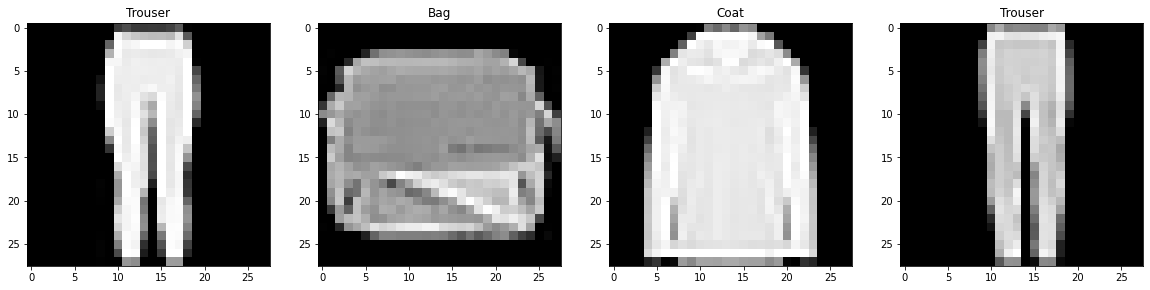

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  batch = iter.next()
  ax[idx].imshow(np.squeeze(cv2.cvtColor(batch['image'], cv2.COLOR_BGR2RGB)))
  ax[idx].title.set_text(classes[batch['label']])

In [10]:
iter = data.as_numpy_iterator()
X, y = [], []
for i in range(len(data)):
  batch = iter.next()
  X.append(batch['image'])
  y.append(batch['label'])

In [11]:
X = np.array(X)
X = X / 255

In [12]:
data = tf.data.Dataset.from_tensor_slices((X, y))
data = data.cache()
data = data.shuffle(60000)
data = data.batch(128)
data = data.prefetch(64)

In [13]:
train = data.take(int(len(data)*0.7))
val = data.skip(int(len(data)*0.7)).take(int(len(data)*0.2))
test = data.skip(int(len(data)*0.9)).take(int(len(data)*0.1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, LeakyReLU, Dense, Reshape, Dropout, MaxPooling2D

In [15]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(28, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        4060      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4048      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 16)         0

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
328/328 [==============================] - 5s 7ms/step - loss: 0.8768 - accuracy: 0.6679 - val_loss: 0.6057 - val_accuracy: 0.7723
Epoch 2/20
328/328 [==============================] - 2s 6ms/step - loss: 0.5357 - accuracy: 0.8013 - val_loss: 0.4871 - val_accuracy: 0.8228
Epoch 3/20
328/328 [==============================] - 2s 6ms/step - loss: 0.4623 - accuracy: 0.8310 - val_loss: 0.4120 - val_accuracy: 0.8522
Epoch 4/20
328/328 [==============================] - 2s 6ms/step - loss: 0.4166 - accuracy: 0.8468 - val_loss: 0.4148 - val_accuracy: 0.8515
Epoch 5/20
328/328 [==============================] - 2s 6ms/step - loss: 0.3855 - accuracy: 0.8586 - val_loss: 0.3576 - val_accuracy: 0.8678
Epoch 6/20
328/328 [==============================] - 2s 6ms/step - loss: 0.3597 - accuracy: 0.8697 - val_loss: 0.3403 - val_accuracy: 0.8775
Epoch 7/20
328/328 [==============================] - 2s 6ms/step - loss: 0.3448 - accuracy: 0.8748 - val_loss: 0.3302 - val_accuracy: 0.8755
Epoch 

In [19]:
model.evaluate(test)

46/46 [==============================] - 1s 3ms/step - loss: 0.2593 - accuracy: 0.9056


[0.259306401014328, 0.9055706262588501]

In [20]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [21]:
for batch in test.as_numpy_iterator():
  X_true, y_true = batch
  yhat = model.predict(X_true)
  yhat = [np.argmax(y) for y in yhat]
  yhat = np.array(yhat)
  y_true = y_true.flatten()
  yhat = yhat.flatten()
  acc.update_state(y_true, yhat)
print(acc.result().numpy())

4/4 [==============================] - 0s 3ms/step
0.9130435


In [22]:
print(acc.result().numpy())

0.9130435


(28, 28, 4)
(1, 28, 28, 4)
1/1 [==============================] - 0s 17ms/step


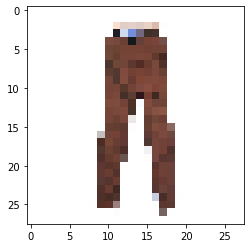

In [49]:
img = cv2.imread('/content/trouser.jpg')
img = cv2.resize(img, (28,28))
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
print(img.shape)
# print(img)
img = img/255
# print(img)
# img = np.array(img)
# img = img / 255
img = np.expand_dims(img, 0)
print(img.shape)
result = model.predict(img)

In [50]:
print(classes[np.argmax(result)])

Trouser
